In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import optuna

# 載入資料&基本觀察

In [2]:
filepath = 'data/train.csv'
df = pd.read_csv(filepath)

In [3]:
df.shape

(15304, 12)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [7]:
def stat(df):
    type_list = df.dtypes
    df_stat = pd.DataFrame(type_list,columns=["data types"])
    df_stat['Missing'] = df.isnull().sum()
    df_stat['unique'] = df.nunique()
    return df_stat
df_stat = stat(df).style.background_gradient(cmap='rainbow')
df_stat

,data types,Missing,unique
id,int64,0,15304
gender,object,0,3
age,float64,0,106
hypertension,int64,0,2
heart_disease,int64,0,2
ever_married,object,0,2
work_type,object,0,5
Residence_type,object,0,2
avg_glucose_level,float64,0,3740
bmi,float64,0,407


In [8]:
df = df.drop(['id'], axis=1)

object     5
float64    3
int64      3
dtype: int64

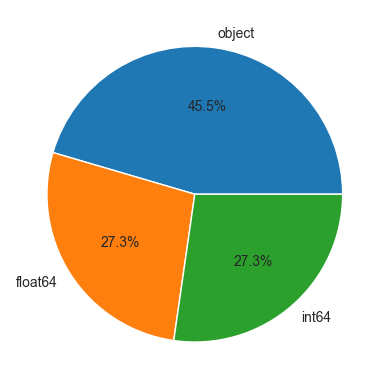

In [99]:
df.dtypes.value_counts().plot(kind="pie",autopct='%.1f%%')
df.dtypes.value_counts()

In [3]:
categorical_col = set(df.columns) - set(df.select_dtypes(include=['float64', 'int64']).columns)
continuous_col = df.select_dtypes(include=['float64', 'int64']).columns
categorical_col = pd.Index(list(categorical_col) + ['hypertension', 'heart_disease', 'stroke'])
continuous_col = continuous_col.drop(['hypertension', 'heart_disease', 'stroke', 'id'])
print('categorical column:\n ', categorical_col)
print('continuous column:\n ', continuous_col)

categorical column:
  Index(['ever_married', 'smoking_status', 'work_type', 'gender',
       'Residence_type', 'hypertension', 'heart_disease', 'stroke'],
      dtype='object')
continuous column:
  Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


# 單變數分析

C:\Users\User\AppData\Local\Temp\ipykernel_49636\2711909440.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2711909440.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2711909440.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2711909440.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2711909440.py:5: UserWarning: Matplotlib is currently using module://ma

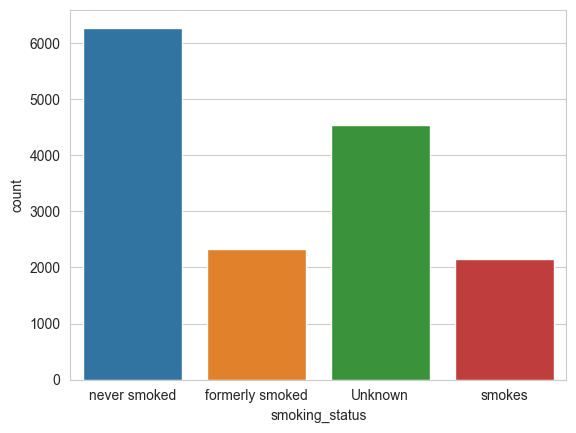

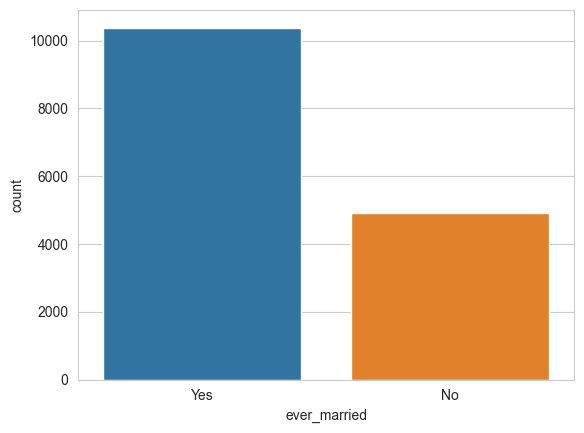

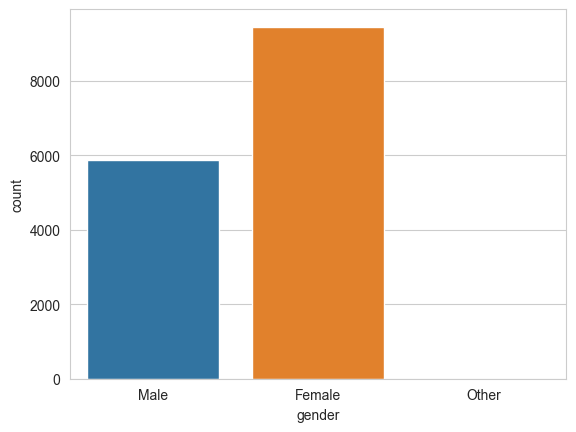

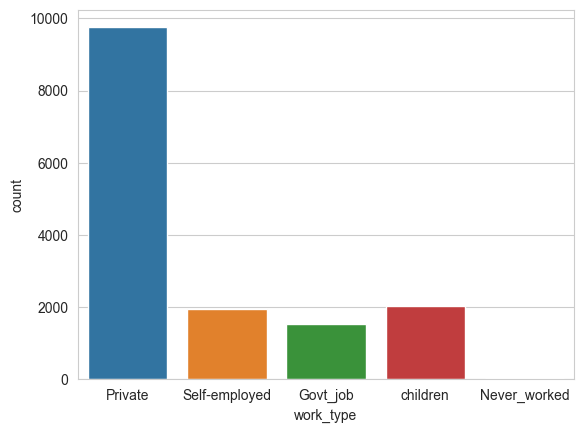

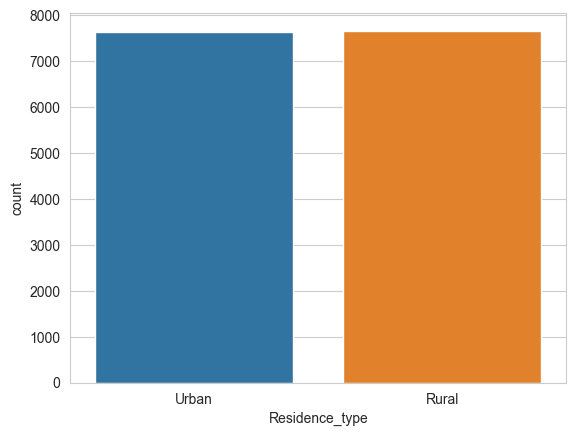

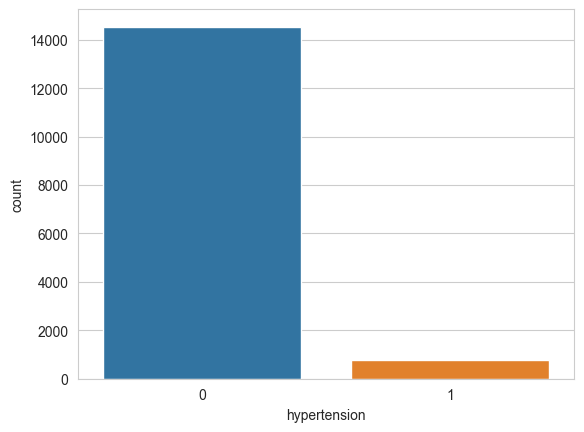

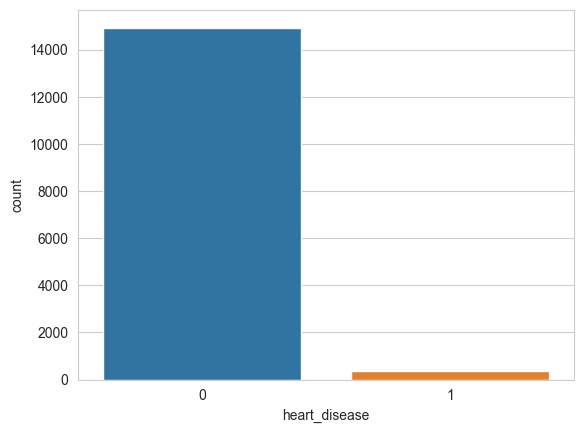

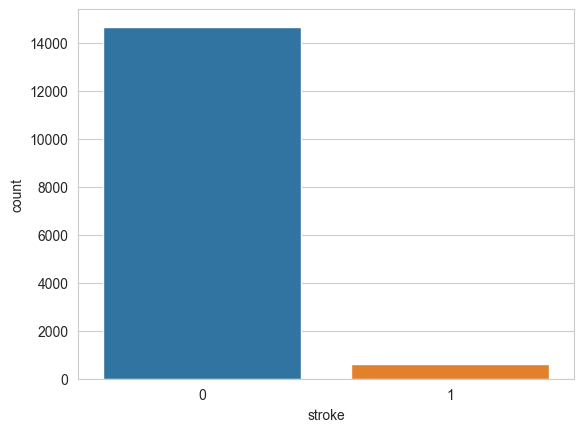

In [10]:
sns.set_style("whitegrid")
for i, col in enumerate(categorical_col):
    fig = plt.figure()
    ax = sns.countplot(x = col, data = df)
    fig.show()

# 樞紐分析 

In [75]:
pvt = df_16up.pivot_table(columns='stroke', index='heart_disease')
pvt

C:\Users\User\AppData\Local\Temp\ipykernel_61984\762844828.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pvt = df_16up.pivot_table(columns='stroke', index='heart_disease')


age            avg_glucose_level             binned_bmi  \
stroke                 0          1                 0           1          0   
heart_disease                                                                  
0              45.423434  68.198230         88.019008  104.629912   2.312215   
1              67.587629  71.181818        107.265086  130.968182   2.512027   

                               bmi            hypertension           \
stroke                1          0          1            0        1   
heart_disease                                                         
0              2.472566  29.352622  30.165841     0.048027  0.20354   
1              2.636364  30.378351  30.965152     0.144330  0.19697   

                        id               
stroke                   0            1  
heart_disease                            
0              7668.790851  7293.470796  
1              7550.082474  7259.242424

In [76]:
# cross tab 
ctb = pd.crosstab(df_16up['stroke'], df_16up['heart_disease'])
ctb

heart_disease,0,1
stroke,,
0,12264,291
1,565,66


In [27]:
categorical_col

Index(['smoking_status', 'Residence_type', 'gender', 'ever_married',
       'work_type', 'hypertension', 'heart_disease', 'stroke'],
      dtype='object')

In [34]:
continuous_col

Index(['id', 'age', 'avg_glucose_level', 'bmi'], dtype='object')

In [13]:
df = df.drop(['id'], axis=1)
df_16up = df[df['age'] >= 16]


# xgboost scale_pos_weight & tuning

In [7]:
df_16up = df[df['age'] > 15].drop(['id'], axis=1)

In [14]:
# 
df_16up['stroke'].value_counts()
data = df_16up.drop(['stroke'], axis=1)
data = pd.get_dummies(data)
target = df_16up['stroke']
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3)

In [24]:
train_x.iloc[0].to_numpy()

array([20.  ,  0.  ,  0.  , 96.84, 27.3 ,  0.  ,  1.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,
        0.  ,  0.  ])

In [25]:
train_x.iloc[0]

age                               20.00
hypertension                       0.00
heart_disease                      0.00
avg_glucose_level                 96.84
bmi                               27.30
gender_Female                      0.00
gender_Male                        1.00
ever_married_No                    1.00
ever_married_Yes                   0.00
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  1.00
work_type_Self-employed            0.00
work_type_children                 0.00
Residence_type_Rural               0.00
Residence_type_Urban               1.00
smoking_status_Unknown             1.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        0.00
smoking_status_smokes              0.00
Name: 1131, dtype: float64

In [17]:
from joblib import load 
model = load('model/EasyEnsembleClassifier')

pred = model.predict([train_x.iloc[0]])
print('')

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EasyEnsembleClassifier was fitted with feature names
  warnings.warn(


In [13]:
len(train_x.columns)
train_x.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [194]:
df['stroke'].value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [96]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(tree_method="hist", enable_categorical=True, scale_pos_weight=20)
xgb.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [5]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [11]:
warnings.filterwarnings('ignore')

In [97]:
test_y_pred = xgb.predict(test_x)
roc_auc_score(test_y,test_y_pred)

0.6234513274336284

In [98]:
xgb_class_weight = xgb

In [91]:
from sklearn.metrics import roc_auc_score

In [100]:
def objective(trial):
    """Define the objective function"""
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
    }

    # Fit the model
    optuna_model = XGBClassifier(**params, tree_method="hist", enable_categorical=True, scale_pos_weight=20)
    optuna_model.fit(train_x, train_y)
    auc = roc_auc_score(test_y, optuna_model.predict(test_x))
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

trial = study.best_trial

print('Auc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

xgb_param = trial.params

[I 2023-05-26 16:54:38,406] A new study created in memory with name: no-name-f83fc079-63b5-4e44-a8b7-7a722c613d1b
C:\Users\User\AppData\Local\Temp\ipykernel_61984\535629093.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_61984\535629093.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_61984\535629093.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

Auc: 0.7869368463395012
Best hyperparameters: {'max_depth': 2, 'learning_rate': 0.05020849117921616, 'n_estimators': 382, 'min_child_weight': 1, 'gamma': 0.022873903686807744, 'subsample': 0.403264457952181, 'colsample_bytree': 0.29701991624650265, 'reg_alpha': 0.0157578496250994, 'reg_lambda': 3.9984414237693363e-07}


### 處理BMI

In [35]:
df_16up = df[df['age'] >= 15]

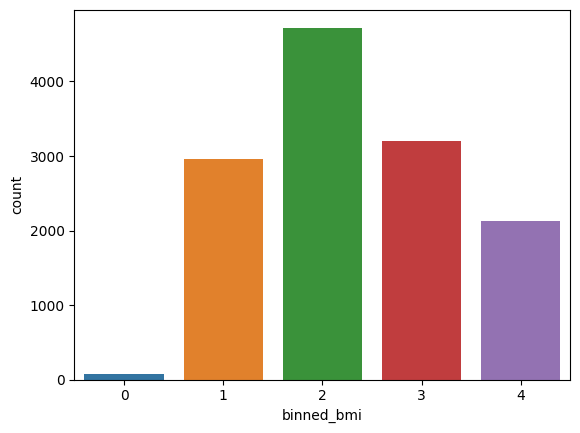

In [6]:
# df_16up['binned_bmi']
def bin_bmi(x):
    if x < 18.5:
        return 0
    elif x < 24.9:
        return 1
    elif x < 29.9: # fat 
        return 2
    elif x < 34.9: # fat 
        return 3
    else:          # fat
        return 4
df_16up['binned_bmi'] = df_16up['bmi'].map(bin_bmi)
ax = sns.countplot(data=df_16up, x='binned_bmi')

In [42]:
pd.crosstab(df_16up['stroke'], df_16up['binned_bmi'])

binned_bmi,0,1,2,3,4
stroke,,,,,
0,89,2914,4506,3022,2024
1,1,88,246,193,103


In [44]:
continuous_col

Index(['id', 'age', 'avg_glucose_level', 'bmi'], dtype='object')

### 處理avg_glucose_level

In [47]:
df_stroke = df_16up[df_16up['stroke'] == 1]
df_no_stroke = df_16up[df_16up['stroke'] == 0]


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

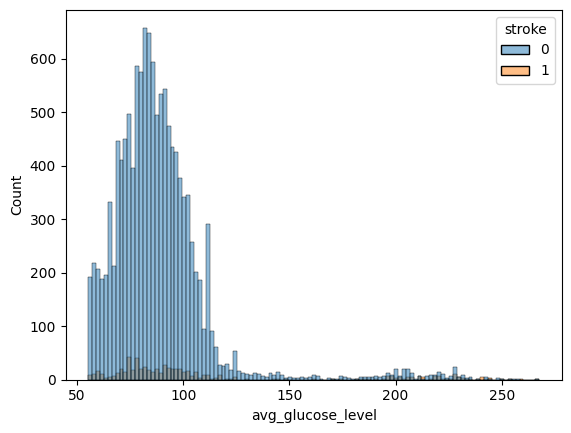

In [53]:
sns.histplot(data = df_16up,x='avg_glucose_level', hue='stroke')

In [57]:
continuous_col

Index(['id', 'age', 'avg_glucose_level', 'bmi'], dtype='object')

In [56]:
categorical_col

Index(['smoking_status', 'Residence_type', 'gender', 'ever_married',
       'work_type', 'hypertension', 'heart_disease', 'stroke'],
      dtype='object')

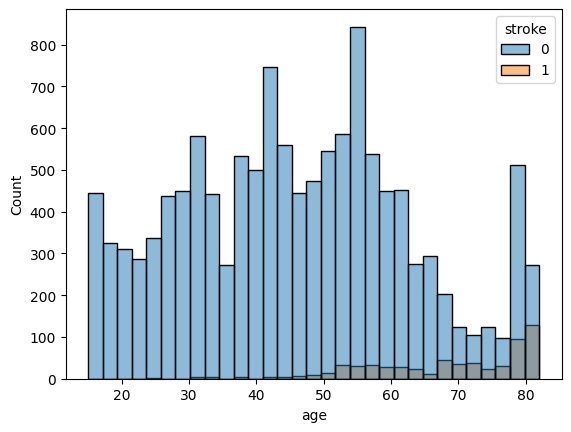

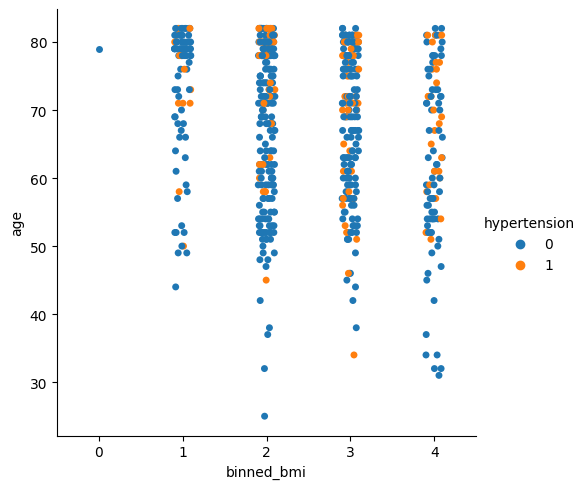

In [71]:
sns.histplot(data=df_16up, x='age', hue='stroke')
sns.catplot(data=df_stroke, y='age', x='binned_bmi', hue='hypertension')

In [73]:
df_stroke.pivot_table(columns='hypertension', index='heart_disease', values='age')

hypertension,0,1
heart_disease,,
0,67.388889,71.365217
1,71.603774,69.461538


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

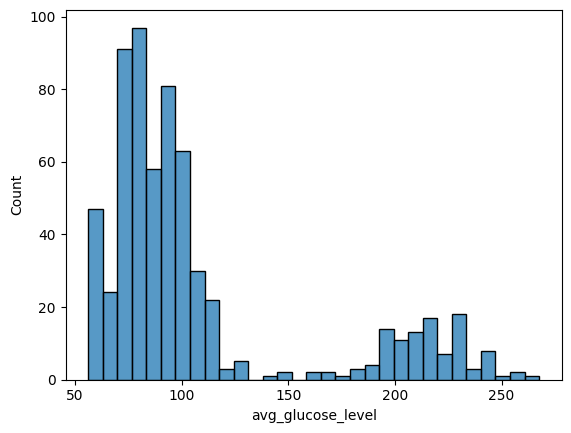

In [50]:
sns.histplot(data=df_stroke, x='avg_glucose_level')

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

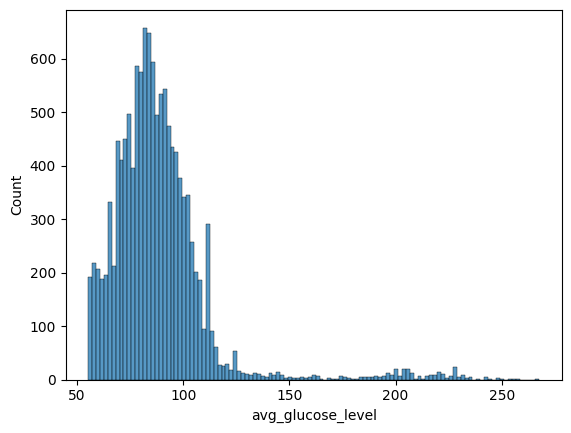

In [49]:
sns.histplot(data=df_no_stroke, x='avg_glucose_level')

### 處理低年齡數據

In [38]:
df_under = df[df['age'] <= 16]
df_under['stroke'].value_counts()
# df_ten
df_ten = df[(df['age'] == 10) & df['stroke']]
df_ten

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3226,Male,10.0,0,0,No,children,Urban,93.28,18.4,Unknown,1


In [39]:
df_under.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2374.000000,2374.000000,2374.0,2374.000000,2374.000000,2374.000000
mean,7.536057,0.001264,0.0,87.040750,20.468627,0.000421
std,5.071544,0.035533,0.0,17.017641,4.640025,0.020524
min,0.080000,0.000000,0.0,55.290000,10.300000,0.000000
25%,3.000000,0.000000,0.0,75.220000,17.600000,0.000000
50%,7.000000,0.000000,0.0,85.800000,19.350000,0.000000
75%,13.000000,0.000000,0.0,97.597500,22.400000,0.000000
max,16.000000,1.000000,0.0,233.710000,60.900000,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_49636\3258978267.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\3258978267.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\3258978267.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\3258978267.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\3258978267.py:5: UserWarning: Matplotlib is currently using module://ma

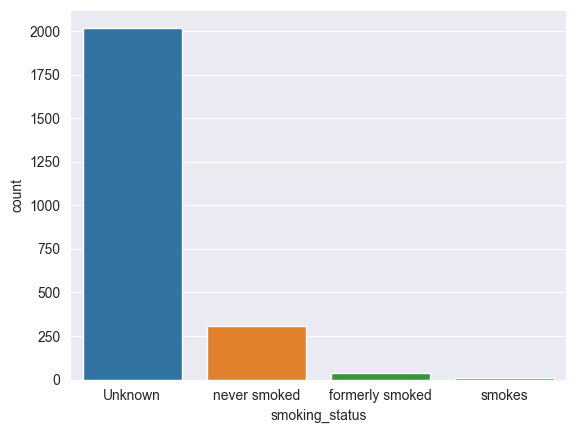

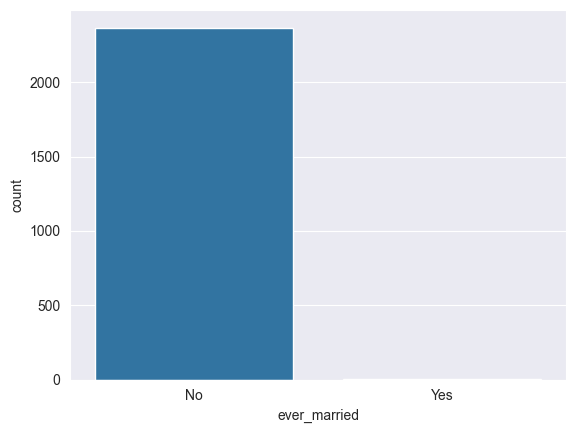

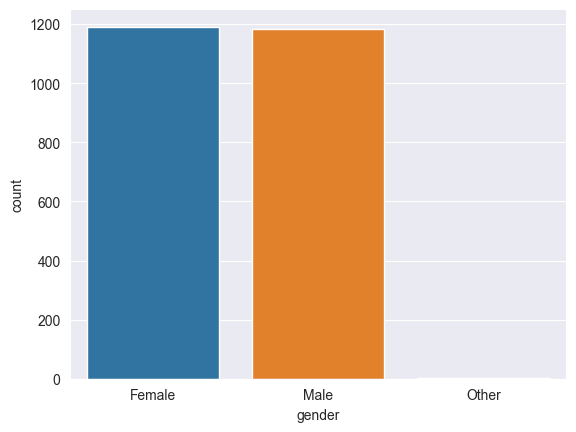

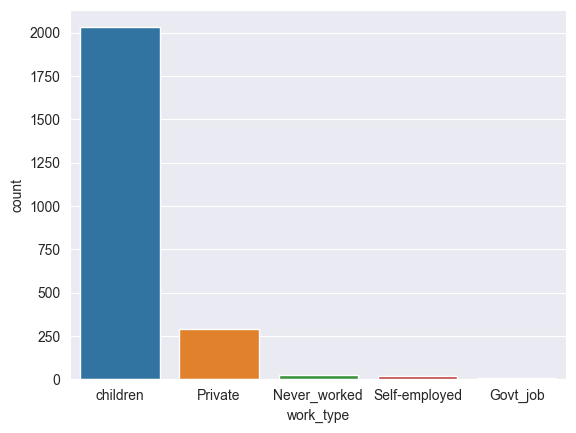

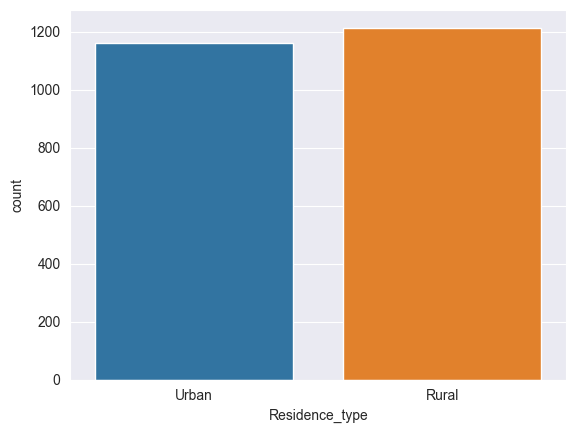

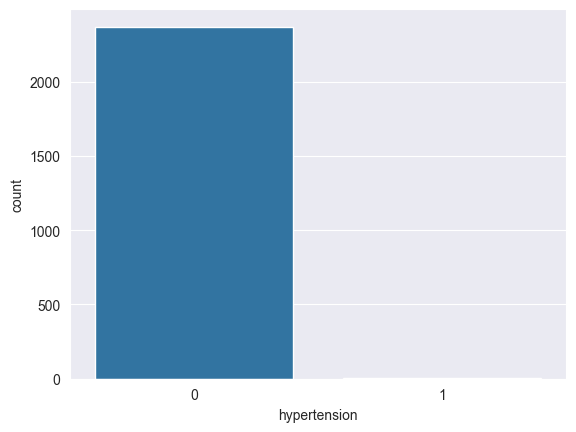

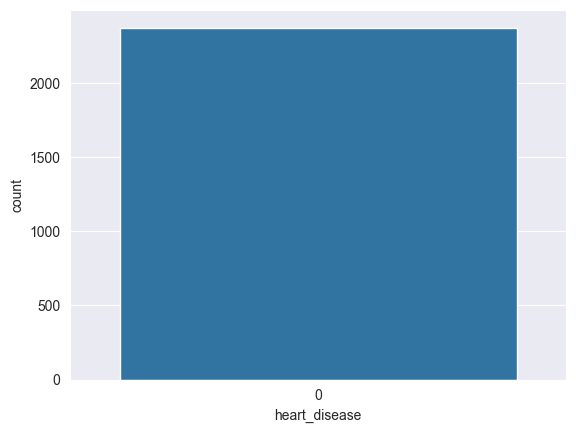

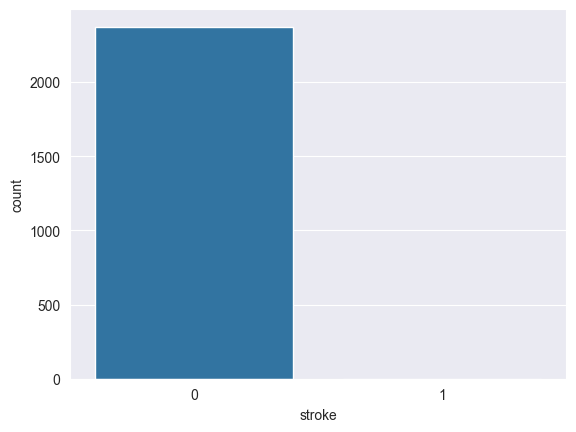

In [40]:
for i, col in enumerate(categorical_col):
    if col == 'id': continue
    fig = plt.figure()
    ax = sns.countplot(x = col, data = df_under)
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_49636\2456577081.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2456577081.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2456577081.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


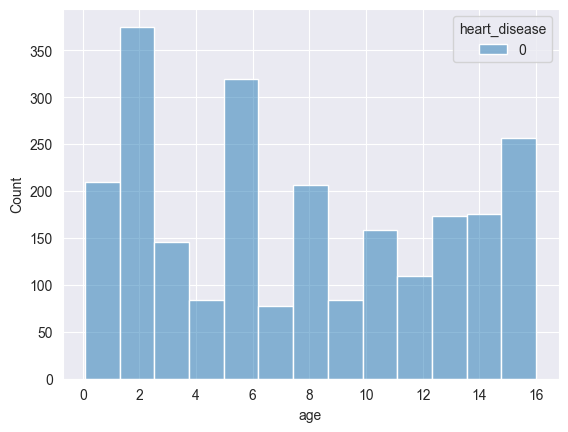

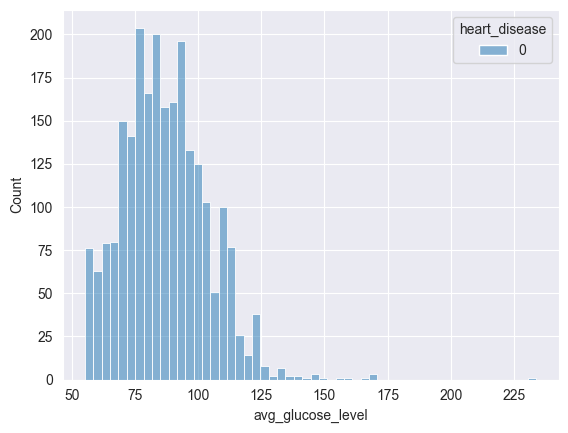

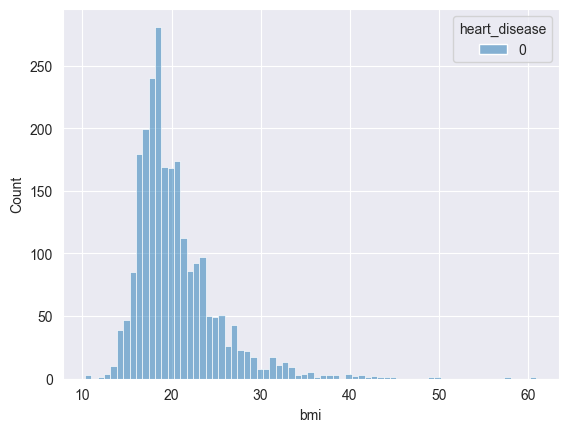

In [36]:

for i, col in enumerate(continuous_col):
    if col == 'id': continue
    fig = plt.figure()
    ax = sns.histplot(x = col, data = df_under, hue='heart_disease')
    fig.show()

In [3]:
df_16up = df[df['age'] >= 15]
df_16up.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000
mean,7648.039284,47.017367,0.057561,0.027074,89.370473,29.418175,0.047854
std,4417.639804,17.434619,0.232920,0.162306,26.565555,6.095760,0.213465
min,0.000000,15.000000,0.000000,0.000000,55.220000,12.200000,0.000000
25%,3836.500000,33.000000,0.000000,0.000000,74.860000,25.100000,0.000000
50%,7644.000000,47.000000,0.000000,0.000000,85.070000,28.600000,0.000000
75%,11464.750000,59.000000,0.000000,0.000000,96.840000,32.600000,0.000000
max,15302.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


### 其餘數據處理

C:\Users\User\AppData\Local\Temp\ipykernel_49636\799991035.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\799991035.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_49636\799991035.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


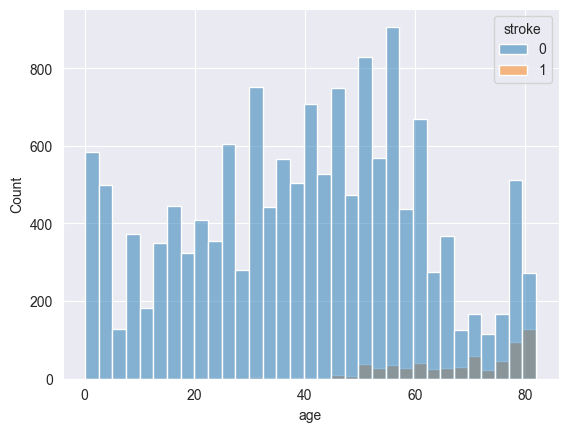

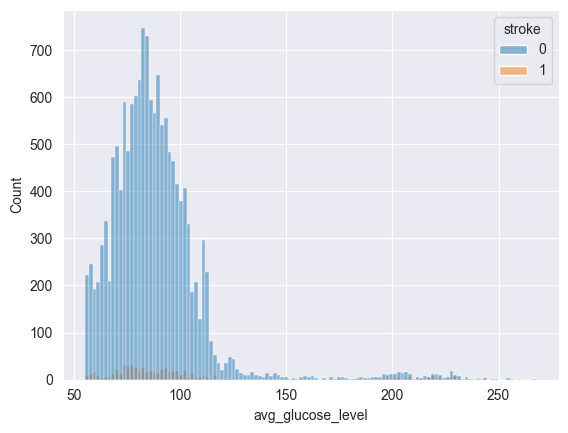

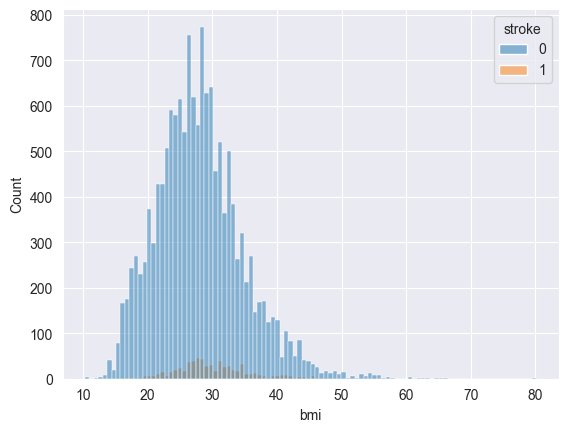

In [11]:
sns.set_style("darkgrid")
# fig, ax = plt.subplots(2, 2)
for i, col in enumerate(continuous_col):
    if col == 'id': continue
    fig = plt.figure()
    ax = sns.histplot(x = col, data = df, hue='stroke')
    fig.show()

In [101]:
df_stroke = df[df['stroke'] == 1]
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
25,Female,55.0,0,0,Yes,Private,Urban,97.57,28.1,never smoked,1
61,Female,78.0,0,0,Yes,Self-employed,Urban,182.90,32.9,never smoked,1
67,Female,80.0,0,0,Yes,Private,Urban,64.92,30.0,formerly smoked,1
86,Female,79.0,0,0,Yes,Self-employed,Rural,80.63,21.9,formerly smoked,1
114,Female,57.0,0,0,Yes,Private,Urban,95.58,40.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15225,Female,76.0,0,1,Yes,Private,Rural,60.98,29.1,never smoked,1
15246,Male,81.0,0,0,Yes,Self-employed,Rural,95.84,23.4,Unknown,1
15250,Male,67.0,0,0,Yes,Self-employed,Rural,98.39,44.1,formerly smoked,1
15275,Female,69.0,0,0,Yes,Private,Urban,99.10,22.7,formerly smoked,1


In [123]:
df_stroke = df[df['stroke']==1]

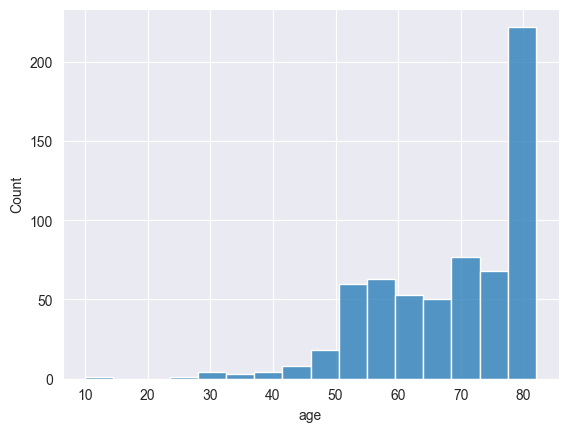

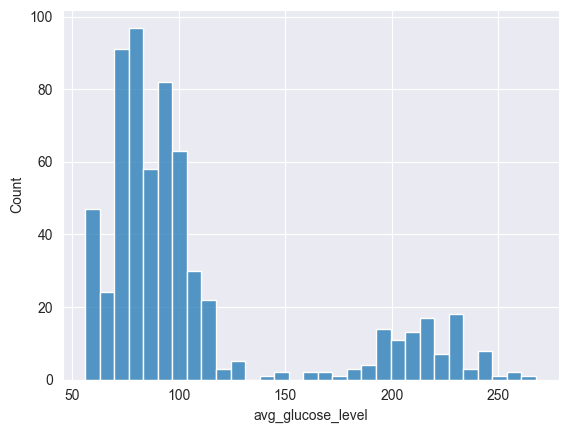

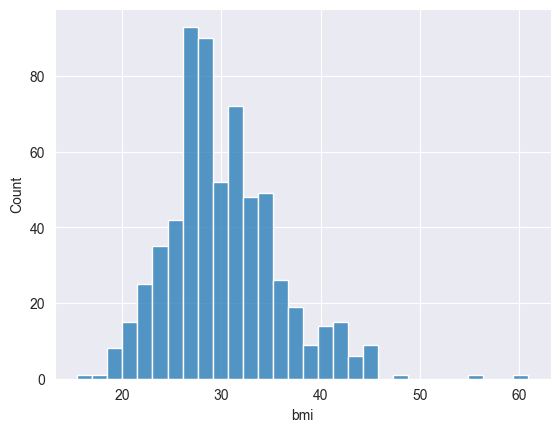

In [128]:
sns.set_style("darkgrid")
for i, col in enumerate(continuous_col):
    fig = plt.figure()
    ax = sns.histplot(x = col, data = df_stroke)
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_41904\29238481.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\29238481.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\29238481.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\29238481.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\29238481.py:5: UserWarning: Matplotlib is currently using module://matplotlib_i

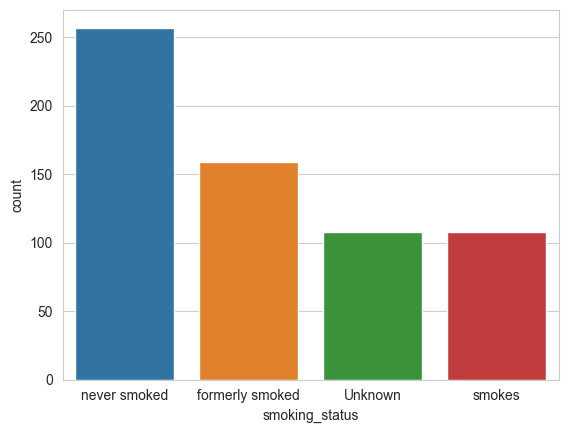

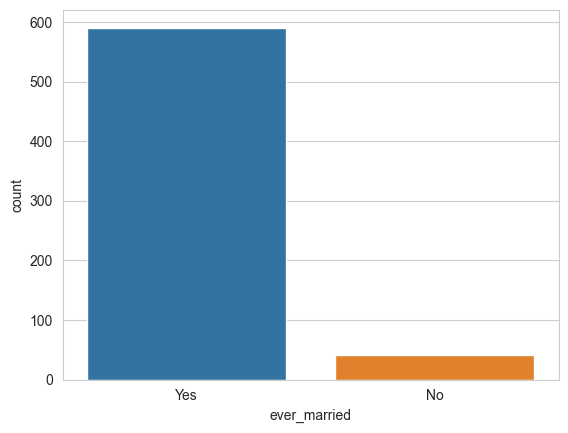

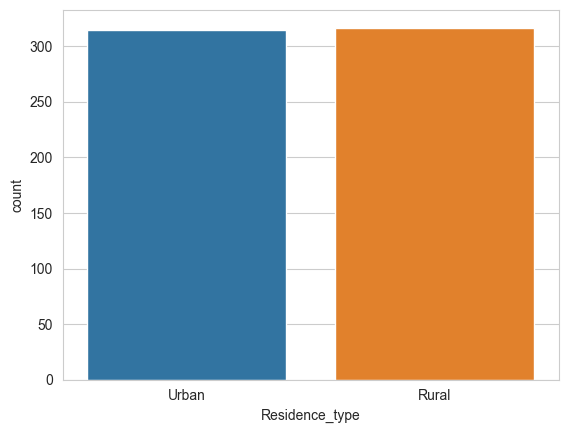

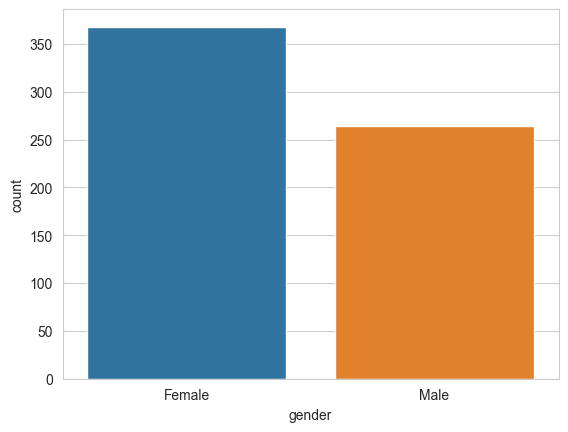

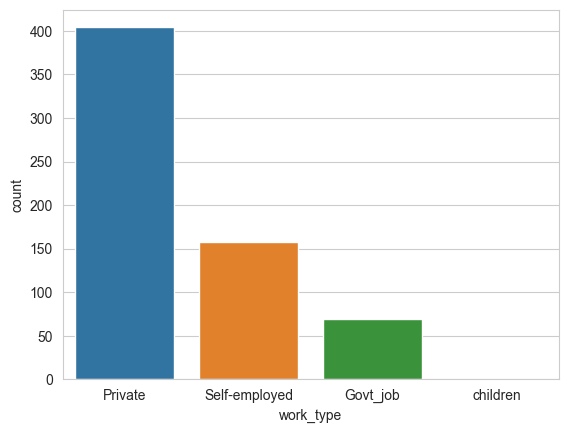

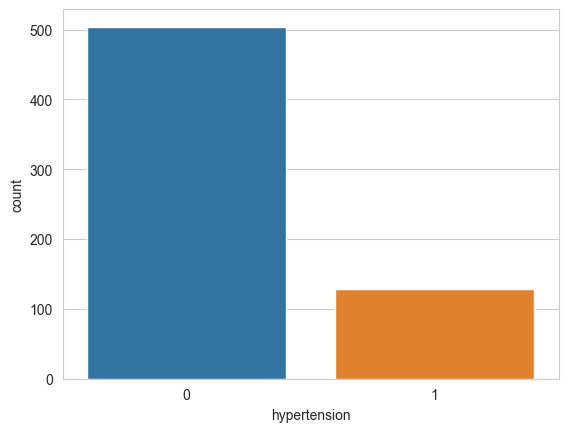

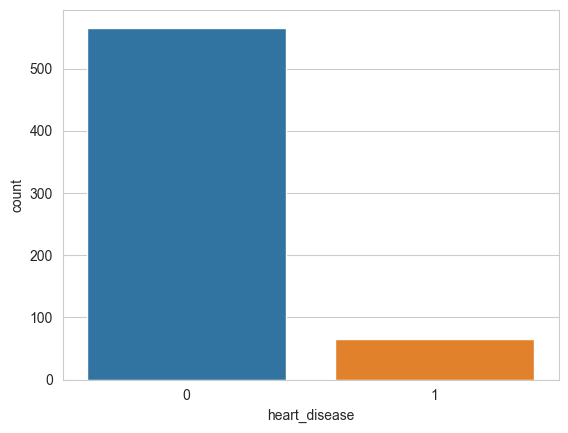

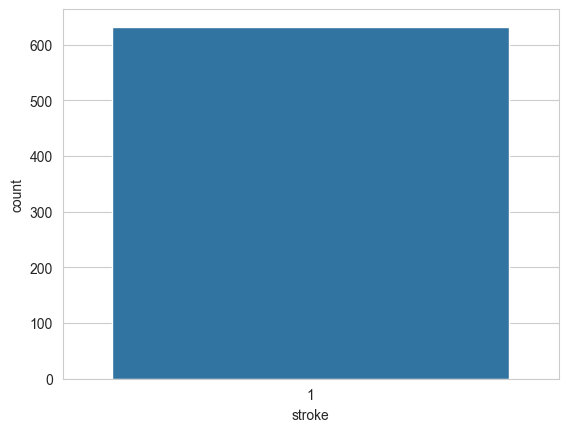

In [59]:
sns.set_style("whitegrid")
for i, col in enumerate(categorical_col):
    fig = plt.figure()
    ax = sns.countplot(x = col, data = df_stroke)
    fig.show()

### 百分比

C:\Users\User\AppData\Local\Temp\ipykernel_41904\3339671472.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\3339671472.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\3339671472.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

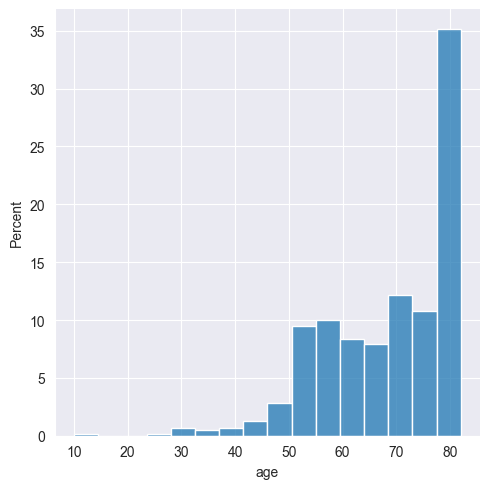

<Figure size 640x480 with 0 Axes>

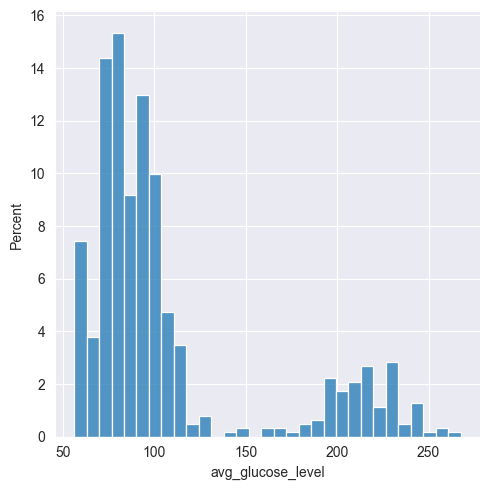

<Figure size 640x480 with 0 Axes>

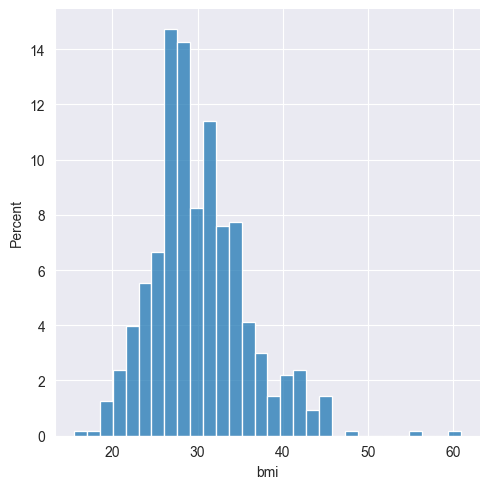

In [94]:
sns.set_style("darkgrid")
# fig, ax = plt.subplots(2, 2)
for i, col in enumerate(continuous_col):
    if col == 'id': continue
    fig = plt.figure()
    ax = sns.displot(x = col, data = df_stroke, stat='percent')
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_41904\342053799.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\342053799.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_41904\342053799.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

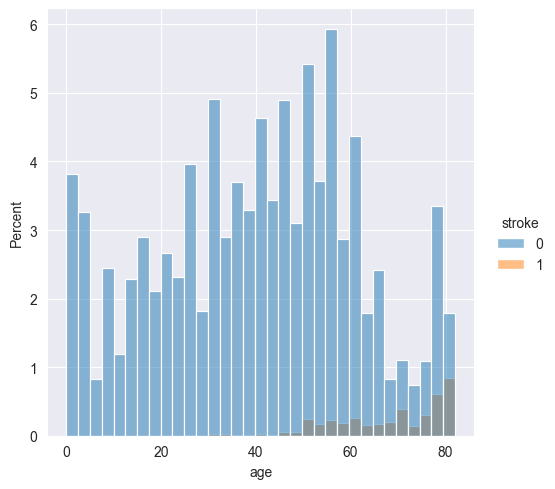

<Figure size 640x480 with 0 Axes>

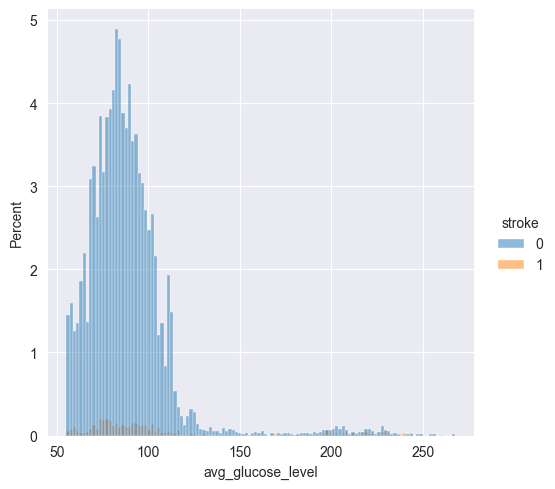

<Figure size 640x480 with 0 Axes>

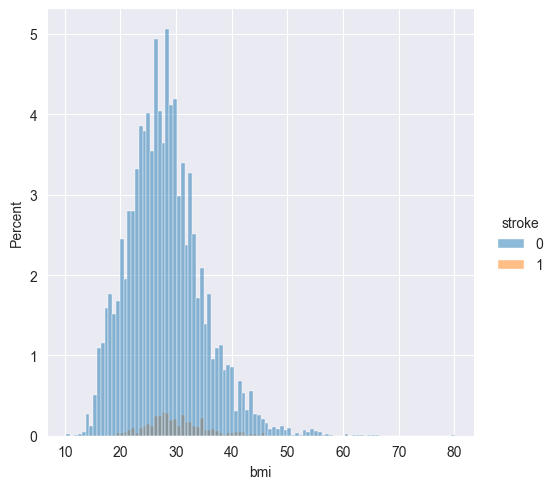

In [93]:
sns.set_style("darkgrid")
# fig, ax = plt.subplots(2, 2)
for i, col in enumerate(continuous_col):
    if col == 'id': continue
    fig = plt.figure()
    ax = sns.displot(x = col, data = df, hue='stroke', stat='percent')
    fig.show()

### 觀察相關係數

In [133]:
df_16up_dummy = pd.get_dummies(df_16up)
corr = df_16up_dummy.corr()

In [134]:
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,binned_bmi,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.232206,0.203473,0.119992,0.099119,0.276830,0.129362,-0.051469,0.051469,-0.540814,...,-0.072370,-0.264140,0.312222,-0.077806,-0.015201,0.015201,-0.073911,0.205525,-0.061344,-0.049199
hypertension,0.232206,1.000000,0.068948,0.123909,0.073830,0.139677,0.068954,-0.016557,0.016557,-0.092084,...,-0.010621,-0.063362,0.072490,-0.012268,-0.002635,0.002635,-0.070649,0.035008,0.022442,0.009841
heart_disease,0.203473,0.068948,1.000000,0.139992,0.028503,0.106850,0.033660,-0.074768,0.074768,-0.063641,...,-0.007174,-0.043734,0.061556,0.001212,-0.007985,0.007985,-0.021995,0.060664,-0.032174,0.004640
avg_glucose_level,0.119992,0.123909,0.139992,1.000000,0.107718,0.152119,0.102339,-0.042401,0.042401,-0.054885,...,-0.004302,-0.011574,0.023478,0.004296,0.009938,-0.009938,-0.019717,0.043914,-0.033498,0.021216
bmi,0.099119,0.073830,0.028503,0.107718,1.000000,0.029537,0.917964,-0.046890,0.046890,-0.157103,...,-0.014894,-0.019716,0.010630,-0.058468,-0.002034,0.002034,-0.042886,0.052291,-0.020103,0.019499
stroke,0.276830,0.139677,0.106850,0.152119,0.029537,1.000000,0.035215,-0.025486,0.025486,-0.079889,...,-0.009641,-0.046584,0.065634,-0.011136,0.001053,-0.001053,-0.016059,0.045036,-0.025037,0.004707
binned_bmi,0.129362,0.068954,0.033660,0.102339,0.917964,0.035215,1.000000,-0.076182,0.076182,-0.173222,...,-0.020945,-0.023208,0.019172,-0.055619,-0.000926,0.000926,-0.042768,0.059403,-0.027386,0.021871
gender_Female,-0.051469,-0.016557,-0.074768,-0.042401,-0.046890,-0.025486,-0.076182,1.000000,-1.000000,0.029308,...,0.010016,0.002921,0.008473,-0.001302,-0.002325,0.002325,-0.020500,-0.060880,0.088849,-0.035046
gender_Male,0.051469,0.016557,0.074768,0.042401,0.046890,0.025486,0.076182,-1.000000,1.000000,-0.029308,...,-0.010016,-0.002921,-0.008473,0.001302,0.002325,-0.002325,0.020500,0.060880,-0.088849,0.035046
ever_married_No,-0.540814,-0.092084,-0.063641,-0.054885,-0.157103,-0.079889,-0.173222,0.029308,-0.029308,1.000000,...,0.083785,0.136825,-0.125154,0.092961,0.003540,-0.003540,0.082434,-0.115938,0.033463,-0.014616


In [136]:
print('The feature pairs which pearson correlation > 0.5: ')
for i in corr.columns:
    for j in corr.columns:
        if i == j: break
        if abs(corr.loc[i,j]) > 0.4:
            print('({}, {})'.format(i, j))

The feature pairs which pearson correlation > 0.5: 
(binned_bmi, bmi)
(gender_Male, gender_Female)
(ever_married_No, age)
(ever_married_Yes, age)
(ever_married_Yes, ever_married_No)
(work_type_Private, work_type_Govt_job)
(work_type_Self-employed, work_type_Private)
(Residence_type_Urban, Residence_type_Rural)
(smoking_status_never smoked, smoking_status_Unknown)
(smoking_status_never smoked, smoking_status_formerly smoked)
(smoking_status_smokes, smoking_status_never smoked)


# 模型訓練&測試

### easy ensemble

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier

In [ ]:
# tuning for BalancedRandomForestClassifier
def objective(trial:optuna.trial.Trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
    }

    optuna_model = BalancedRandomForestClassifier(**params)
    optuna_model.fit(train_x, train_y)
    auc = roc_auc_score(test_y, optuna_model.predict(test_x))
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

brf_param = trial.params

In [28]:
tune_brf = BalancedRandomForestClassifier(**brf_param)
tune_brf.fit(train_x, train_y)
train_y_pred = tune_brf.predict(train_x)
# roc_auc_score(train_y, train_y_pred)
test_y_pred = tune_brf.predict(test_x)
roc_auc_score(test_y, test_y_pred)

0.7698551566360253

In [26]:
bbc = BalancedBaggingClassifier()
bbc.fit(train_x, train_y)
test_y_pred = bbc.predict(test_x)
roc_auc_score(test_y, test_y_pred)

0.7545726044682395

In [25]:
rbc = RUSBoostClassifier()
rbc.fit(train_x, train_y)
test_y_pred = rbc.predict(test_x)
roc_auc_score(test_y, test_y_pred)

0.7519826412023798

In [14]:
eec = EasyEnsembleClassifier()
eec.fit(train_x, train_y)
test_y_pred = eec.predict(test_x)
roc_auc_score(test_y, test_y_pred)

0.7935146652120231

In [16]:
from joblib import load, dump 
dump(eec, 'EasyEnsembleClassifier')

['EasyEnsembleClassifier']

In [20]:
train_x.loc[0]

age                               28.00
hypertension                       0.00
heart_disease                      0.00
avg_glucose_level                 79.53
bmi                               31.10
gender_Female                      0.00
gender_Male                        1.00
ever_married_No                    0.00
ever_married_Yes                   1.00
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  1.00
work_type_Self-employed            0.00
work_type_children                 0.00
Residence_type_Rural               0.00
Residence_type_Urban               1.00
smoking_status_Unknown             0.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        1.00
smoking_status_smokes              0.00
Name: 0, dtype: float64

In [22]:
eec_model = load('model/EasyEnsembleClassifier')
eec_model.predict(test_x)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
pred = eec_model.predict([train_x.loc[0]])
print('y_true: {}, pred: {}'.format(train_y.loc[0], pred[0]))

y_true: 0, pred: 0


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but EasyEnsembleClassifier was fitted with feature names
  warnings.warn(


### feature importance (EasyEnsemble)

In [27]:
clfs = []
feature_set = set()
# print(eec.feature_names_in_)
for p in model.estimators_:
    clfs.append(p[1])
for clf in clfs:
    m = {f_name:f_value for f_name, f_value in zip(model.feature_names_in_, clf.feature_importances_) if f_value > 0}
    sorted_m = sorted(m.items(), key=lambda x:x[1], reverse=True)
    print(sorted_m)
    # feature_set.add(sorted_m.keys())
    for item in m:
        feature_set.add(item)
print(feature_set)

NameError: name 'eec' is not defined

In [184]:
print(feature_set)
"""
'age'
'bmi'
'avg_glucose_level'

'hypertension',
'smoking_status',
'ever_married',
'gender',
'Residence_type',
'heart_disease',
'ever_married_No',
'work_type',
"""
# 

{'hypertension', 'smoking_status_smokes', 'age', 'smoking_status_never smoked', 'ever_married_Yes', 'avg_glucose_level', 'gender_Male', 'bmi', 'Residence_type_Urban', 'gender_Female', 'heart_disease', 'ever_married_No', 'work_type_Self-employed', 'work_type_Private'}


### submmision for EasyEnsemble

In [113]:
submission = pd.read_csv(filepath_or_buffer='data/sample_submission.csv')
df_test = pd.read_csv(filepath_or_buffer='data/test.csv')
df_test.drop(['id'], axis=1, inplace=True)
data = pd.get_dummies(df_test)
data.drop(['gender_Other'], axis=1, inplace=True)

In [118]:
pred = eec.predict_proba(data)
submission['stroke'] = pred[:,1]

In [120]:
submission.to_csv('data/submission3.csv', index=False)

In [105]:
test_y_pred = eec.predict(test_x)
roc_auc_score(test_y, test_y_pred)

0.7747827835880934

### SMOTE

In [53]:
data = pd.get_dummies(df_16up.drop(['stroke'], axis=1))
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,0,0,79.53,31.1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
1,33.0,0,0,78.44,23.9,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
2,42.0,0,0,103.00,40.3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
3,56.0,0,0,64.87,28.8,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
4,24.0,0,0,73.36,28.8,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,17.0,0,0,77.65,24.8,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
15299,22.0,0,0,72.63,19.5,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
15300,46.0,1,0,101.19,32.1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
15301,75.0,0,0,87.69,26.2,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
target = df_16up['stroke']
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=42)

In [65]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
train_x_smo, train_y_smo = smote.fit_resample(train_x, train_y)

TypeError: SMOTE.__init__() got an unexpected keyword argument 'ratio'

In [57]:
train_x.shape

(9230, 20)

In [66]:
train_y_smo.value_counts()

0    8781
1    8781
Name: stroke, dtype: int64

In [62]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, RocCurveDisplay
xgb = XGBClassifier(tree_method="hist", enable_categorical=True)
xgb.fit(train_x_smo, train_y_smo)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

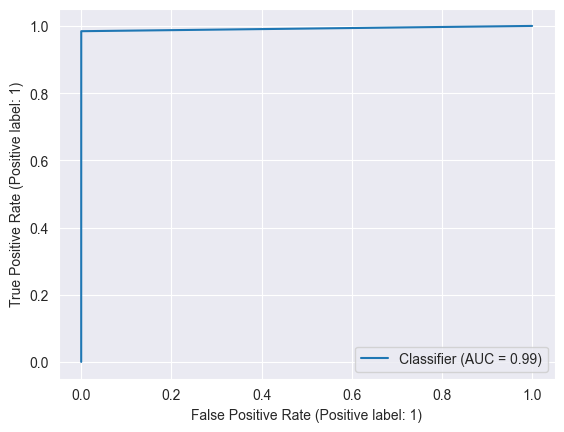

In [64]:
train_y_pred = xgb.predict(train_x_smo)
RocCurveDisplay.from_predictions(train_y_smo, train_y_pred)
plt.show()

test roc auc score:  0.8278388278388278


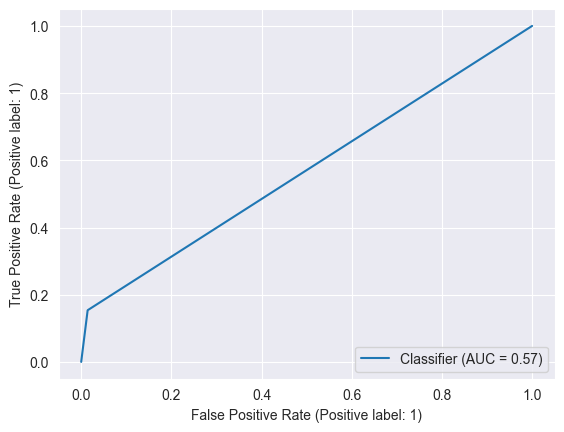

In [63]:
test_y_pred = xgb.predict(test_x)
print('test roc auc score: ', roc_auc_score(test_y, xgb.predict_proba(test_x)[:, 1]))
RocCurveDisplay.from_predictions(test_y, test_y_pred)

### isolation forest  (異常檢測)

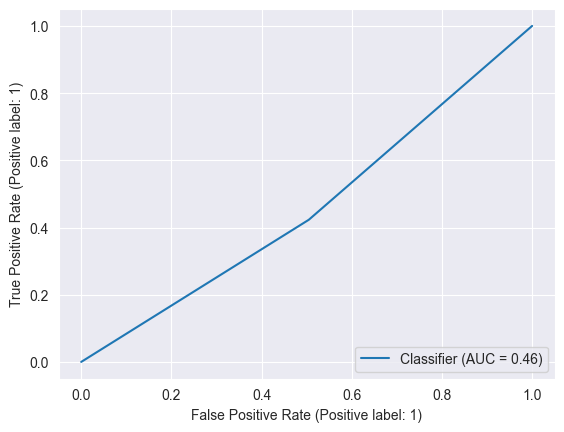

In [67]:
from sklearn.ensemble import IsolationForest
clf  = IsolationForest(random_state=43).fit(train_x_smo)
test_y_pred = clf.predict(test_x)
# print('test roc auc score: ', roc_auc_score(test_y, xgb.predict_proba(test_x)[:, 1]))
RocCurveDisplay.from_predictions(test_y, test_y_pred)

### balance weight

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, class_weight="balanced")
rf.fit(train_x_smo, train_y_smo)

RandomForestClassifier(class_weight='balanced', random_state=0)

0.5291249555955438

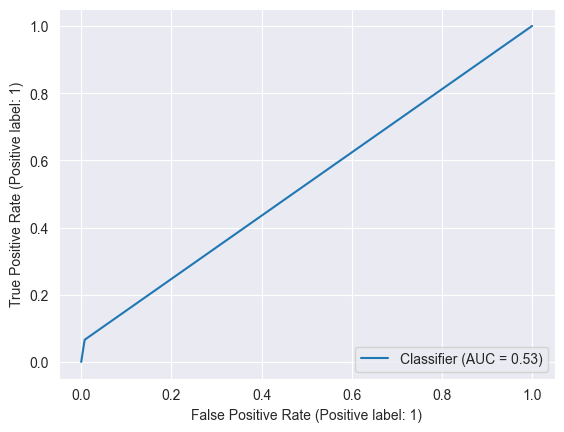

In [85]:
test_y_pred = rf.predict(test_x)
RocCurveDisplay.from_predictions(test_y, test_y_pred)
roc_auc_score(test_y, test_y_pred)

In [74]:
from sklearn import svm
svm_clf = svm.OneClassSVM(nu=0.2, kernel="rbf", gamma=0.1)
svm_clf.fit(train_x_smo, train_y_smo)

OneClassSVM(gamma=0.1, nu=0.2)

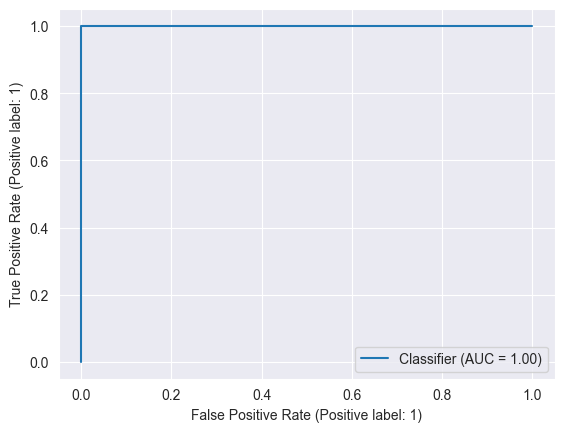

In [78]:
train_y_pred = rf.predict(train_x)
RocCurveDisplay.from_predictions(train_y, train_y_pred)

0.5697688638865108

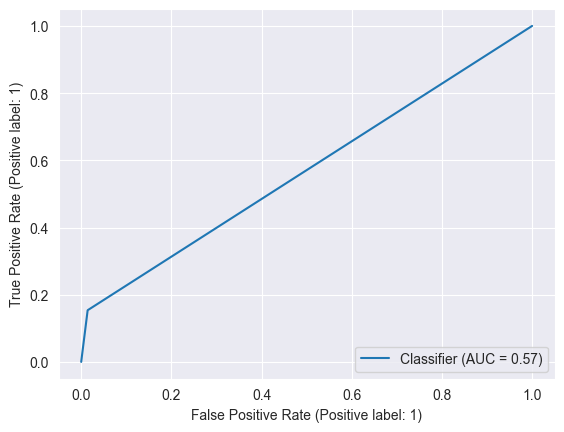

In [83]:
test_y_pred = xgb.predict(test_x)
auc = RocCurveDisplay.from_predictions(test_y, test_y_pred)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_y, test_y_pred)

In [82]:
print(auc)

### optuna

In [ ]:
import optuna
import warnings
warnings.filterwarnings('ignore')

##### random forest

In [115]:
def objective(trial:optuna.trial.Trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
    }

    optuna_model = RandomForestClassifier(**params)
    optuna_model.fit(train_x_smo, train_y_smo)
    auc = roc_auc_score(test_y, optuna_model.predict(test_x))
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 200)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

rf_param = trial.params

[I 2023-05-26 00:39:48,865] A new study created in memory with name: no-name-2cfdf996-209d-4a04-bcbe-8faccda61a9e
[I 2023-05-26 00:39:54,208] Trial 0 finished with value: 0.6086555204202263 and parameters: {'n_estimators': 478, 'max_depth': 25, 'min_samples_split': 63, 'min_samples_leaf': 30}. Best is trial 0 with value: 0.6086555204202263.
[I 2023-05-26 00:39:56,361] Trial 1 finished with value: 0.5535503182562006 and parameters: {'n_estimators': 167, 'max_depth': 44, 'min_samples_split': 26, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6086555204202263.
[I 2023-05-26 00:40:02,831] Trial 2 finished with value: 0.6103428897546544 and parameters: {'n_estimators': 566, 'max_depth': 33, 'min_samples_split': 113, 'min_samples_leaf': 28}. Best is trial 2 with value: 0.6103428897546544.
[I 2023-05-26 00:40:07,902] Trial 3 finished with value: 0.616102366102366 and parameters: {'n_estimators': 484, 'max_depth': 40, 'min_samples_split': 100, 'min_samples_leaf': 44}. Best is trial 3 wi

In [ ]:
# {'n_estimators': 126, 'max_depth': 4, 'min_samples_split': 117, 'min_samples_leaf': 50}

##### xgb

In [87]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(train_x_smo, train_y_smo)
    auc = roc_auc_score(test_y, optuna_model.predict(test_x))
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

trial = study.best_trial

print('Auc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

xgb_param = trial.params

[I 2023-05-25 23:30:23,954] A new study created in memory with name: no-name-2615ef86-7b37-472c-bb6a-6cde246e5d50
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2076658022.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2076658022.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\User\AppData\Local\Temp\ipykernel_49636\2076658022.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

Auc: 0.781786311198076
Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.011083228149796724, 'n_estimators': 187, 'min_child_weight': 8, 'gamma': 0.00652246621546679, 'subsample': 0.012319036274873118, 'colsample_bytree': 0.6258752441592268, 'reg_alpha': 1.711792795319211e-08, 'reg_lambda': 0.2844551596901769}


In [89]:
xgb = XGBClassifier(**xgb_param)
xgb.fit(train_x_smo, train_y_smo)
test_y_pred = xgb.predict(test_x)
auc = roc_auc_score(test_y, test_y_pred)
auc

0.781786311198076

# make submission for test

In [97]:
submission = pd.read_csv(filepath_or_buffer='data/sample_submission.csv')
df_test = pd.read_csv(filepath_or_buffer='data/test.csv')
df_test.drop(['id'], axis=1, inplace=True)
data = pd.get_dummies(df_test)
data.drop(['gender_Other'], axis=1, inplace=True)


In [110]:
pred = xgb.predict_proba(data)
print(pred[0][0])
submission['stroke'] = pred[:,1]

0.5707145


In [111]:
submission

,id,stroke
0,15304,0.429286
1,15305,0.589389
2,15306,0.191270
3,15307,0.485591
4,15308,0.191904
...,...,...
10199,25503,0.125084
10200,25504,0.252290
10201,25505,0.192615
10202,25506,0.137211


In [113]:
submission.to_csv('data/submission2.csv', index=False)

In [93]:
train_x_smo.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [92]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

# baseline

In [77]:
categorical_col = categorical_col.drop(['stroke'])

In [78]:
# baseline 
data = df.drop(['stroke', 'id'], axis=1)
data[categorical_col] = data[categorical_col].astype("category")
target = df['stroke']
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=45)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(10712, 10)
(4592, 10)
(10712,)
(4592,)


In [81]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 4123 to 7115
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             10712 non-null  category
 1   age                10712 non-null  float64 
 2   hypertension       10712 non-null  category
 3   heart_disease      10712 non-null  category
 4   ever_married       10712 non-null  category
 5   work_type          10712 non-null  category
 6   Residence_type     10712 non-null  category
 7   avg_glucose_level  10712 non-null  float64 
 8   bmi                10712 non-null  float64 
 9   smoking_status     10712 non-null  category
dtypes: category(7), float64(3)
memory usage: 409.0 KB


In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method="hist", enable_categorical=True)
xgb.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

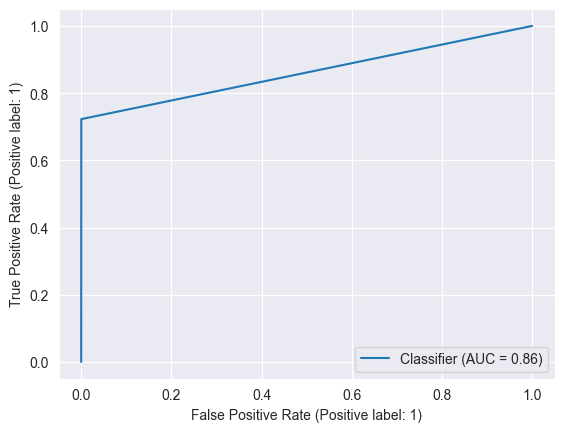

test roc auc score:  0.8511370230322786


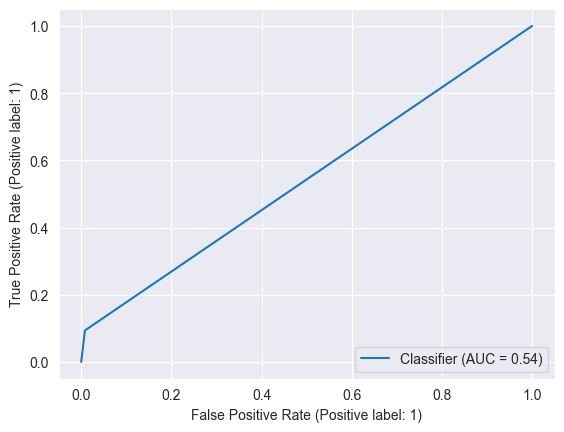

In [91]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, RocCurveDisplay
train_y_pred = xgb.predict(train_x)
RocCurveDisplay.from_predictions(train_y, train_y_pred)
plt.show()

test_y_pred = xgb.predict(test_x)
print('test roc auc score: ', roc_auc_score(test_y, xgb.predict_proba(test_x)[:, 1]))
RocCurveDisplay.from_predictions(test_y, test_y_pred)